In [ ]:
# Credit: https://zablo.net/blog/post/pytorch-resnet-mnist-jupyter-notebook-2021/

In [ ]:
!pip3 install torch==1.11.0 torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     |████████████████▎               | 834.1 MB 1.2 MB/s eta 0:10:47tcmalloc: large alloc 1147494400 bytes == 0x559b04042000 @  0x7f51c9b3a615 0x559b01ed617c 0x559b01fb647a 0x559b01ed8f9d 0x559b01fcad4d 0x559b01f4cec8 0x559b01f47a2e 0x559b01eda88a 0x559b01f4cd30 0x559b01f47a2e 0x559b01eda88a 0x559b01f49719 0x559b01fcbb76 0x559b01f48d95 0x559b01fcbb76 0x559b01f48d95 0x559b01fcbb76 0x559b01f48d95 0x559b01edace9 0x559b01f1e579 0x559b01ed9902 0x559b01f4cc4d 0x559b01f47a2e 0x559b01eda88a 0x559b01f49719 0x559b01f47a2e 0x559b01eda88a 0x559b01f488f6 0x559b01eda7aa 0x559b01f48b4f 0x559b01f47a2e
     |████████████████████▋           | 1055.7 MB 1.3 MB/s eta 0:07:13tcmalloc: large alloc 1434370048 bytes == 0x559b48698000 @  0x7f51c9b3a615 0x559b01ed617c 0x559b01fb647a 0x559b01ed8f9d 0x559b01fcad4d 0x559b01f4cec8 0x559b01f47a2e 0x559b01eda88a 0x559b01f4cd30 0x559b01f47a2e 0x559b01eda88a 0x559b01f49719 0x559b01fcbb

In [ ]:
!pip install -q pytorch-lightning

     |████████████████████████████████| 582 kB 29.5 MB/s 
     |████████████████████████████████| 136 kB 66.5 MB/s 
     |████████████████████████████████| 596 kB 55.1 MB/s 
     |████████████████████████████████| 408 kB 71.5 MB/s 
     |████████████████████████████████| 1.1 MB 68.0 MB/s 
     |████████████████████████████████| 144 kB 68.0 MB/s 
     |████████████████████████████████| 94 kB 4.3 MB/s 
     |████████████████████████████████| 271 kB 72.5 MB/s 


In [ ]:
from torchvision.models import resnet18
from torchvision.datasets import MNIST
from torchvision import transforms
from torch import nn
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision


In [ ]:
# Load Dataset
train_ds = MNIST("mnist", train=True, download=True, transform=transforms.ToTensor())
test_ds = MNIST("mnist", train=False, download=True, transform=transforms.ToTensor())
#train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
#test_dl = DataLoader(test_ds, batch_size=64)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [ ]:
# restricted training set
isolated_indexes = (train_ds.targets == 0) | (train_ds.targets == 1) | (train_ds.targets == 2) | (train_ds.targets == 3)
train_ds.targets = train_ds.targets[isolated_indexes]
train_ds.data = train_ds.data[isolated_indexes]

# restricted test set
isolated_indexes = (test_ds.targets == 0) | (test_ds.targets == 1) | (test_ds.targets == 2) | (test_ds.targets == 3)
test_ds.targets = test_ds.targets[isolated_indexes]
test_ds.data = test_ds.data[isolated_indexes]

In [ ]:
# create the proper dataloaders
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True, )
test_dl = DataLoader(test_ds, batch_size=64)

tensor([2, 1, 0, 1, 0, 0, 1, 3, 0, 0, 1, 3, 1, 3, 2, 1, 2, 1, 1, 2, 3, 1, 2, 3,
        0, 1, 3, 3, 0, 0, 2, 1, 3, 2, 2, 3, 1, 3, 3, 1, 1, 0, 2, 1, 3, 2, 0, 1,
        0, 1, 3, 1, 1, 2, 0, 2, 1, 0, 3, 1, 2, 3, 2, 1])


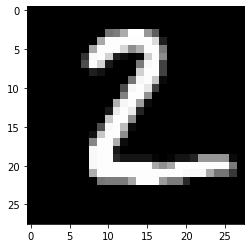

In [ ]:
images, labels = iter(test_dl).next()
image = images[0]
print(labels)
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
images.shape

torch.Size([64, 1, 28, 28])

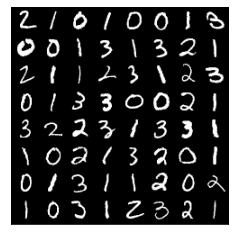

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

show(torchvision.utils.make_grid(images))

In [ ]:
import pytorch_lightning as pl
#from pytorch_lightning.core.decorators import auto_move_data

class ResNetMNIST(pl.LightningModule):
  def __init__(self):
    super().__init__()
    # define model and loss
    self.model = resnet18(num_classes=4)
    self.model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    self.model.relu = nn.ReLU(inplace=False)
    self.model.layer1[0].relu = nn.ReLU(inplace=False)
    self.model.layer1[1].relu = nn.ReLU(inplace=False)
    self.model.layer2[0].relu = nn.ReLU(inplace=False)
    self.model.layer2[1].relu = nn.ReLU(inplace=False)
    self.model.layer3[0].relu = nn.ReLU(inplace=False)
    self.model.layer3[1].relu = nn.ReLU(inplace=False)
    self.model.layer4[0].relu = nn.ReLU(inplace=False)
    self.model.layer4[1].relu = nn.ReLU(inplace=False)
    self.loss = nn.CrossEntropyLoss()

  #"@auto_move_data" # this decorator automatically handles moving your tensors to GPU if required
  def forward(self, x):
    return self.model(x)
  
  def training_step(self, batch, batch_no):
    # implement single training step
    x, y = batch
    logits = self(x)
    loss = self.loss(logits, y)
    return loss
  
  def configure_optimizers(self):
    # choose your optimizer
    return torch.optim.RMSprop(self.parameters(), lr=0.005)

In [ ]:
model = ResNetMNIST()
trainer = pl.Trainer(
    gpus=1, # use one GPU
    max_epochs=1, # set number of epochs
    progress_bar_refresh_rate=30 # set to >= 20 if running in Google Colab
)
trainer.fit(model, train_dl)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:91: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=30)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.2 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.68

Training: 0it [00:00, ?it/s]

In [ ]:
trainer.save_checkpoint("resnet18_mnist.pt")

In [ ]:
from tqdm.autonotebook import tqdm

def get_prediction(x, model: pl.LightningModule):
  model.freeze() # prepares model for predicting
  probabilities = torch.softmax(model(x), dim=1)
  predicted_class = torch.argmax(probabilities, dim=1)
  return predicted_class, probabilities

inference_model = ResNetMNIST.load_from_checkpoint("resnet18_mnist.pt", map_location="cpu")

In [ ]:
true_y, pred_y = [], []
for batch in tqdm(iter(test_dl), total=len(test_dl)):
  x, y = batch
  true_y.extend(y)
  preds, probs = get_prediction(x, inference_model)
  pred_y.extend(preds.cpu())

  0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_y, pred_y, digits=3))

              precision    recall  f1-score   support

           0      0.991     0.995     0.993       980
           1      0.997     0.993     0.995      1135
           2      0.983     0.986     0.985      1032
           3      0.992     0.989     0.991      1010

    accuracy                          0.991      4157
   macro avg      0.991     0.991     0.991      4157
weighted avg      0.991     0.991     0.991      4157



In [ ]:
type(inference_model)

__main__.ResNetMNIST

In [ ]:
type(inference_model.model)

torchvision.models.resnet.ResNet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = torch.save(inference_model.model, 'drive/MyDrive/mnist-0123-only-noinplace')

In [ ]:
# load the model back and test it
model = torch.load('drive/MyDrive/mnist-0123-only-noinplace')
model.eval()
# torch.no_grad()

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(64, 64, kernel_s

In [ ]:
# test against something
type(model)

torchvision.models.resnet.ResNet

In [ ]:
dataiter = iter(test_dl)
test_images, test_labels = dataiter.next()

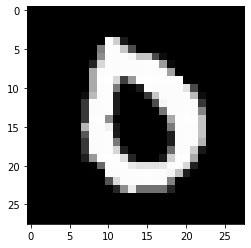

In [ ]:
image = images[6]
# https://stackoverflow.com/questions/3823752/display-image-as-grayscale-using-matplotlib
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
len(images) # should be 64 because we built the loader to issue 64 images per batch (can be thought of as per call as well)

64

In [ ]:
len(labels)

64

In [ ]:
output = model(images)

In [ ]:
_, predicted = torch.max(output, 1) # get maximum along dim 1 https://www.journaldev.com/39463/pytorch-torch-max along per row basis

In [ ]:
predicted

tensor([0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 3, 2, 3, 2, 1, 0,
        0, 2, 1, 2, 0, 1, 2, 2, 3, 0, 0, 2, 2, 0, 0, 1, 3, 3, 1, 3, 2, 3, 1, 2,
        1, 0, 1, 0, 1, 1, 0, 3, 1, 0, 3, 2, 1, 2, 1, 3])

In [ ]:
labels

tensor([0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 3, 2, 3, 2, 1, 0,
        0, 2, 1, 2, 0, 1, 2, 2, 3, 0, 0, 2, 2, 0, 0, 1, 3, 3, 1, 3, 2, 3, 1, 2,
        1, 0, 1, 0, 1, 1, 0, 3, 1, 0, 3, 2, 1, 2, 1, 3])